In [1]:
import MDAnalysis as mda
import numpy as np
from numpy.linalg import norm
import pandas as pd
import sklearn.decomposition
import csv
from MDAnalysis.analysis.distances import distance_array
import freud
import os
import glob
from scipy.optimize import least_squares, curve_fit
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cycler import cycler
from matplotlib.colors import LogNorm
import sys
import math
import matplotlib.pyplot as plt
import gsd.hoomd
import scipy.optimize as opt
from scipy import stats


In [2]:
cd /lustre/miifs01/project/m2_trr146/achangia/cgSimulations/ctd/

/lustre/miifs01/project/m2_trr146/achangia/cgSimulations/ctd


In [3]:
cd 300ctd/

/lustre/miifs01/project/m2_trr146/achangia/cgSimulations/ctd/300ctd


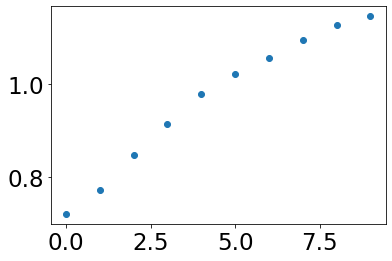

In [47]:
k=0
list_width_avg=np.zeros(10)
list_width_err=np.zeros(10)


for i in range(27,28):
    file='output_file_{}.txt'.format(i)
    if os.path.exists(file):
        k +=1
        list_width_avg += np.genfromtxt(file)[:,1]
        list_width_err += np.genfromtxt(file)[:,2]
        plt.figure()
        plt.plot(np.genfromtxt(file)[:,1],'o')

In [48]:
k

1

In [49]:
list_width_avg=list_width_avg/k

list_width_err =list_width_err/k

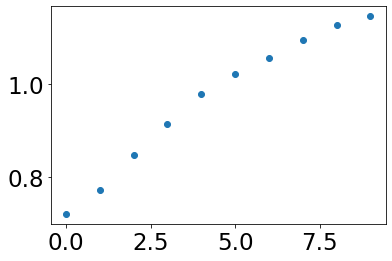

In [50]:
plt.plot(list_width_avg,'o')

In [51]:

def interWidth(x,a,b,c,d):

    return 0.5*(a+b)+.5*(b-a)*np.tanh((np.abs(x)-c)/d)


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def interfacial_tension_slab(lnL, W0, b, m):
    '''
    W0 - intrinsic width
    lnL - log of slab thickness or length
    b - short-wavelength cutoff
    m - KB*T/(2*pi*gamma), where gamma is the interfacial tension
    Return : W - the interface width
    '''
    return W0**2 + m * (lnL - b)

def gamma_slab(L, W2_data):
    '''
    Calculate interfacial tension (gamma) for a slab from data.
    L - Thickness or length of the slab
    W2_data - Squared width of the interface
    Return : gamma, error_gamma
    '''
    # Convert L to ln(L)
    L_data = np.log(L)
    
    initial_guess = [1, 1, 1]

    # Curve fit
    params, cov = curve_fit(interfacial_tension_slab, L_data, W2_data)

    # Parameters -- W0, b, m 
    W0_fit, b_fit, m_fit = params
    W0_err, b_err, m_err = [np.sqrt(cov[0][0]), np.sqrt(cov[1][1]), np.sqrt(cov[2][2])]

    L_fit = np.linspace(min(L_data), max(L_data), 100)
    W2_fit = interfacial_tension_slab(L_fit, W0_fit, b_fit, m_fit)

    # Find the interfacial tension gamma from m, the slope
    KB = 1.380649e-23  # Boltzmann constant
    T = 300  # Temperature (Kelvin)
    gamma = (KB * T) / (2 * np.pi * m_fit)  # Unit -- J/m^2

    # Error of gamma
    error_gamma = (KB * T) / (2 * np.pi * m_fit**2) * m_err

    print(f"Interfacial tension (gamma): {gamma * 1e21:.2f} ± {error_gamma * 1e21:.2f} mN/m")

    plt.figure(figsize=(7, 6))

    plt.scatter(L_data, W2_data)
    

    formatted_gamma = '{:.2g}'.format(gamma * 1e21)
    formatted_gammaErr = '{:.2g}'.format(error_gamma * 1e21)
    plt.plot(L_fit, W2_fit, '--', lw=4.5, label=r'$\gamma={}\pm{}$'.format(formatted_gamma, formatted_gammaErr))
    plt.xlabel(r'ln L [nm]')
    plt.ylabel(r'W$^{2}$ [nm$^{2}$]')
    plt.legend()
    plt.tight_layout()
    plt.savefig('w2_slab_v1.pdf', dpi=300)
    
    return gamma, error_gamma


In [53]:
w2=list_width_avg # (2*np.array(list_width_avg)**(1/2))**

In [54]:
list_width_avg

array([0.7214692 , 0.77321858, 0.84739271, 0.91403674, 0.97750818,
       1.02117131, 1.05574677, 1.09470896, 1.12501149, 1.14454329])

In [58]:
gs=np.linspace(2,7.5,10) #np.genfromtxt('output_file_25.txt')[:,0]

In [59]:
w2=list_width_avg # (2*np.array(list_width_avg)**(1/2))**
width_error = list_width_err
l=gs

Interfacial tension (gamma): 1.80 ± 0.03 mN/m


/home/achangia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


(1.8016305554726622e-21, 2.789333297884854e-23)

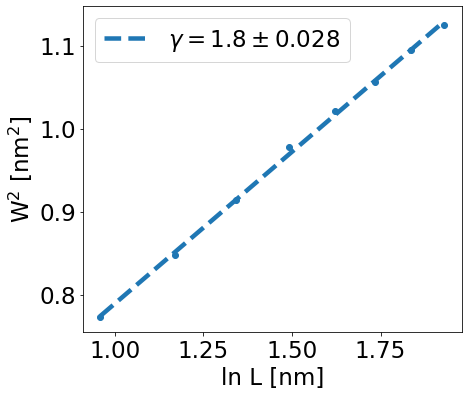

In [60]:
gamma_slab(l[1:-1],w2[1:-1])